## Welcome to the Data Science & Analytics takehome exam. Please submit answers using this Jupyter notebook. Please email zipped files to emi.nakatsugawa@dowjones.com within three days of receiving the exam.

# Scenario

Imagine our team is helping design a campaign to target attendees of the upcoming SXSW festival in 2019. The team would like to better understand website traffic during the most recent SXSW festival (March 2018) to inform what type of content to promote in 2019.

The data in data.csv is a sample of website traffic to wsj.com from first-time visitors who are non-subscribers in the Austin, Texas area (based on IP address).

The objective is to identify which content will turn first-time visitors into loyal readers and subscribers.


<b>Note: Each row in data.csv represents a single page view.</b>
***

# Data

| Column Name	| Description |
|---------------|-------------|
|customerID	|unique customer ID|
|firstVisitDate|	Date and time of customer's first visit|
|secondVisitDate|	Date and time of customer's second visit, if any|
|articleID|	unique ID of the article read on the customer's the first visit|
|section|	section of the article read on the first visit|
|author	|author(s) of the article read on the first visit|
|headline	|headline of the article read on the first visit|
|topicKeywords|	topic keywords in article read on the first visit|
|totalVisits	|the customer's total visits to-date since firstVisitDate|
|wordCount|	word count of the customer's first article|
|videoCount	|number of videos in article|

***

# RESULT OF MY MODEL:

## Our model can predict with 88% accuracy the likelihood of a first time visitor returning, based on the customers interaction with the articles. Please read through the analysis, the model has been built and explained below.

In [180]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [182]:
#Read the data
df = pd.read_csv('data.csv', delimiter = ',')
df.head()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0


# Treat Missing Values before further analysis

<div class="alert alert-block alert-success">
    <b>
<ol><li>Treat wordcount column: Take the average of word count and replace NA values in the wordcount column with the average</li>
    <li> We are not removing missing values for the author name as we are not using that column currently in our analysis. If we would have intended to use that column we would have removed the rows with NA values as it is a categorical column and we can't assume that.
</ol>
    </b>
    </div>

In [183]:
df['wordCount'] = round(df['wordCount'].fillna((df['wordCount'].mean())))
df.head()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0


# Questions

### 1. What percent of customers returned after the first visit?

In [7]:
Total_unique_customers=len(df['customerID'].unique())

In [8]:
df_filtercol = df[["customerID", "secondVisitDate"]]

In [9]:
df_remove_blanks=df_filtercol.dropna()

In [10]:
Unique_returned_customers=len(df_remove_blanks['customerID'].unique())

In [11]:
percentage_of_returned_customers= round((Unique_returned_customers/Total_unique_customers)*100,2)
percentage_of_returned_customers

11.82

# Answer:

<div class="alert alert-block alert-success">
    <b>Based on the analysis 11.82% of users came back after the first contact.</b></div>

### Insights:

<div class="alert alert-block alert-warning">
 <b>   
This is good but it does not say much about the company’s current ability to get its attendees to come back, nor does it report the effect of past actions taken by the organization to improve retention.

One way to address this issue is to get more granular and instead of a single number i.e 11.82% here, retention is defined as a table of multiple retention rates. This table tells the story of how multiple user groups/cohorts retain over time called range retention. Simply it tells us who retains and when.

<ol>
<li>We select a period of interest for example last 12 months based on the current dataset, we will work on it to get the retention story.</li>
<li>We can break this period further into weekly or monthly, that is how we achieve the 'when'.</li> 
<li>Finally, users are grouped into cohorts and that is how we achieve the 'who'.</li></ol> 


Then all we have to do is calculate the retention rate of each user cohort during each window.
</b></div>

### 2. What are the top three best-performing stories in each section, by pageviews?

In [12]:
df_sort_section = df.sort_values(by ='section' )

In [13]:
df_sort_section=df.groupby(['section','articleID'])['totalVisits'].sum() 

In [14]:
df_sort_section = df.groupby(['section','articleID']).agg({"totalVisits": sum})

In [15]:
df_sort_section= df_sort_section.sort_values(by =['section', 'totalVisits'], ascending=False).groupby('section').head(3)

# Answer:

<div class="alert alert-block alert-success"> <b>Based on the analysis the most viewed articles under each section are as follows:</b> </div>

In [16]:
df_sort_section

totalVisits
section      articleID                                               
WSJ_Tech     SB11210326209662973945104584087492498923938          144
             SB11210326209662973945104584093530025809224           79
             SB10961112392510633702504584105390792934438           66
WSJ_Politics SB10053721253826474326804584099101464018882         1517
             SB11210326209662973945104584091642991444798         1022
             SB11704195083378974371404584099474288368000          496
WSJ_Opinion  SB10863058833601644371104583000294067613334          175
             SB10385287216379884548704584103473343707450          127
             SB11513260795640254558004584085581177203524           98
WSJ_Markets  SB12775101498795324251604584091654130126032          238
             SB11027093093037343542404584103340219066918          175
             SB12008635076439604245104584089491434195378          101
WSJ_Life     SB11513260795640254558004584085750469425772          144
             SB11805791893646614375304584073542435430108          141
             SB12775101498795324251604584089691304167728          135
WSJ_Business SB11704195083378974371404584097403724108802          741
             SB11027093093037343542404584101822248659720          220
             SB10342241267609484717704584101481939436054          183

### 3. Based on this data, would you choose to promote a Tech story or a Markets story on social media? Why?

# Answer:

<div class="alert alert-block alert-success"> <b> I would choose to promote Markets stories because based on the data the section WSJ_Market has a higher number of visitors in comparison with the WSJ_Tech. Our goal is to increase customer engagement and target attendees for the SXSW festival in 2019. We would need to enhance our content strategy and calculate how much time and energy we’ll need to dedicate to promote these stories. 

Since market stories are doing well we should focus on it first as it can attract a more customer base. So, rather than looking for the biggest conversations, look for the right conversations that will contribute to success and sustain our audience longer. </b></div>

### 4. Create a visualization exploring the relationship between any of the content characteristics (such as section, author, keywords etc...) and returning visitors. This is an open-ended task. Briefly describe the visualization and the insight.

# Created Function

In [184]:
#Find bag of words based on the most searched keywords

from collections import Counter
topicKeywords=df['topicKeywords'].tolist()
section=df['section'].tolist()
def bag_of_words(col):
    hm={}
    
    for i in range(len(col)):
        for j in str(col[i]).lower().split('|'):
            if j !='':
                if j in hm:
                    hm[j]+=1
                    
                else:
                    hm[j]=1
        
    hm=Counter(hm)
    hm=hm.most_common(20)
        
    return hm

#Find most searched keywords under each section

def keyword_section(col,col2):
    hm={}
    hm2={}
    for i in range(len(col)):
        for j in str(col[i]).lower().split('|'):
            if j !='':
                if col2[i] not in hm:
                    hm[col2[i]]=set([j])
                else:
                    hm[col2[i]].add(j)
        
    hm={k:len(v) for k,v in hm.items()}
    hm=Counter(hm)
    hm=hm.most_common(10)
    return hm

In [185]:
df_secondvisit=df[df["secondVisitDate"].notna()]

In [186]:
section_k_firstvisit=keyword_section(topicKeywords,section)
section_k_secondvisit=keyword_section(df_secondvisit['topicKeywords'].tolist(),df_secondvisit['section'].tolist())

In [187]:
x3,y3=zip(*section_k_firstvisit)
x4,y4=zip(*section_k_secondvisit)

In [188]:
secod_keywords= bag_of_words(df_secondvisit["topicKeywords"].tolist())

# Visualization Insights

<div class="alert alert-block alert-success"> 
    <b>
The below visualization represents the relationship between the first-time visitors and the second-time visitors for each section based on the most trending keywords count and names. 

The highest keyword count tells us a story about which news section is doing good and attracting a large base of customers. 
The lowest keyword count tells us a story of those sections that are not performing well and hence need more visibility and improved marketing strategies.
</b>
<div>

/Users/shivangijha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


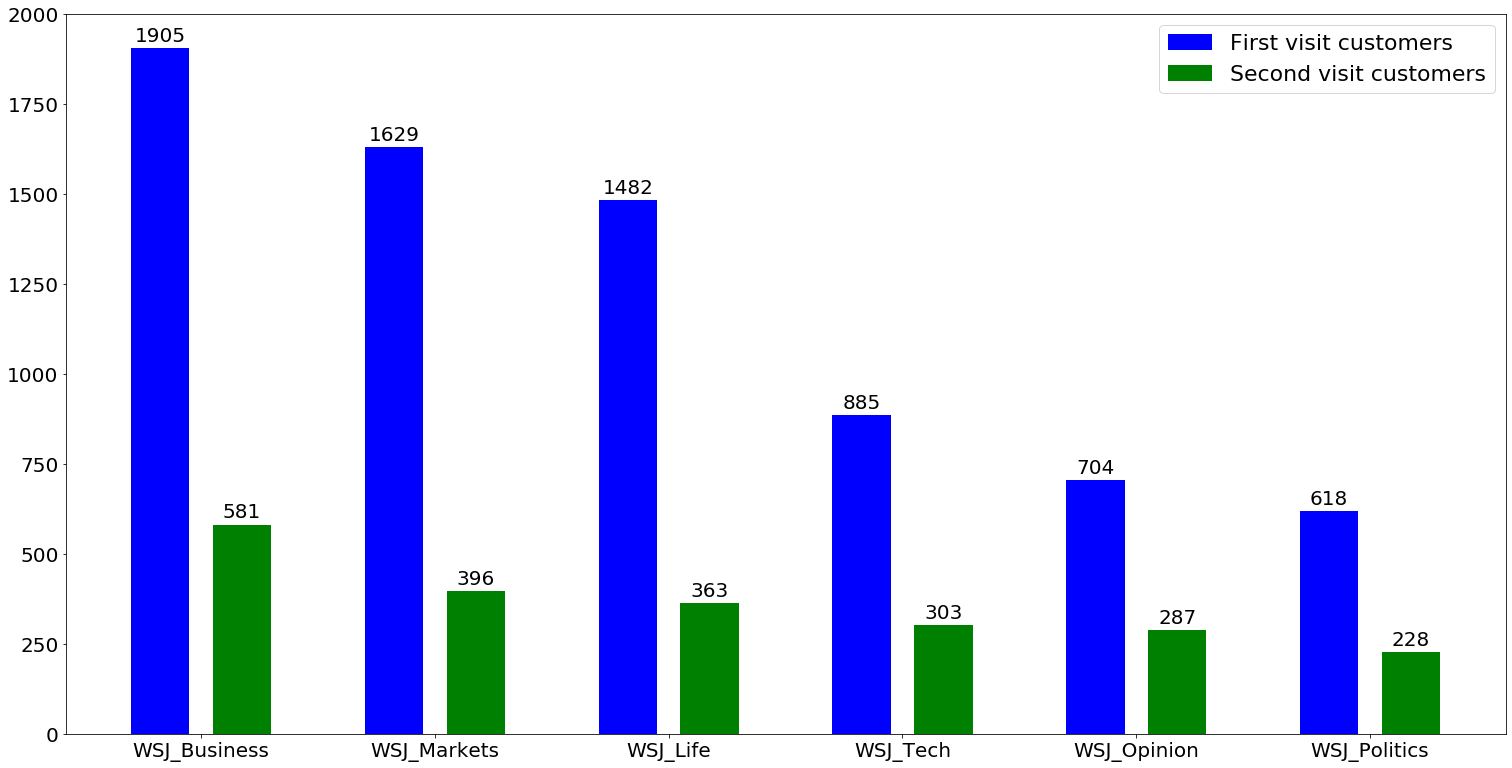

In [189]:
data = [y3,y4]
X = np.arange(len(x3))
width =0.35
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(X - width/2, data[0], color = 'b', width = 0.25, label = "First visit customers keyword count")
rect2 = ax.bar(X + width/2, data[1], color = 'g', width = 0.25, label = "Second visit customers keyword count")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 20)

ax.set_xticks(X)
ax.set_xticklabels(x3)
ax.legend()
autolabel(rect1)
autolabel(rect2)
plt.rcParams.update({'font.size':22})

fig.tight_layout()

In [215]:
d=bag_of_words(topicKeywords)

In [216]:
x,y=zip(*d)
x5,y5=zip(*secod_keywords)

<div class="alert alert-block alert-success"> 
    <b>
The below graph represents the story of the most trending keywords overall in comparison with the same keywords used by second-time visitors.

We can understand the most trending keyword's amount of usage by the second time visitors in comparison with the overall first time visitors. It would help us in improving our SEO and target a more customer base.
</b>
</div>

/Users/shivangijha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


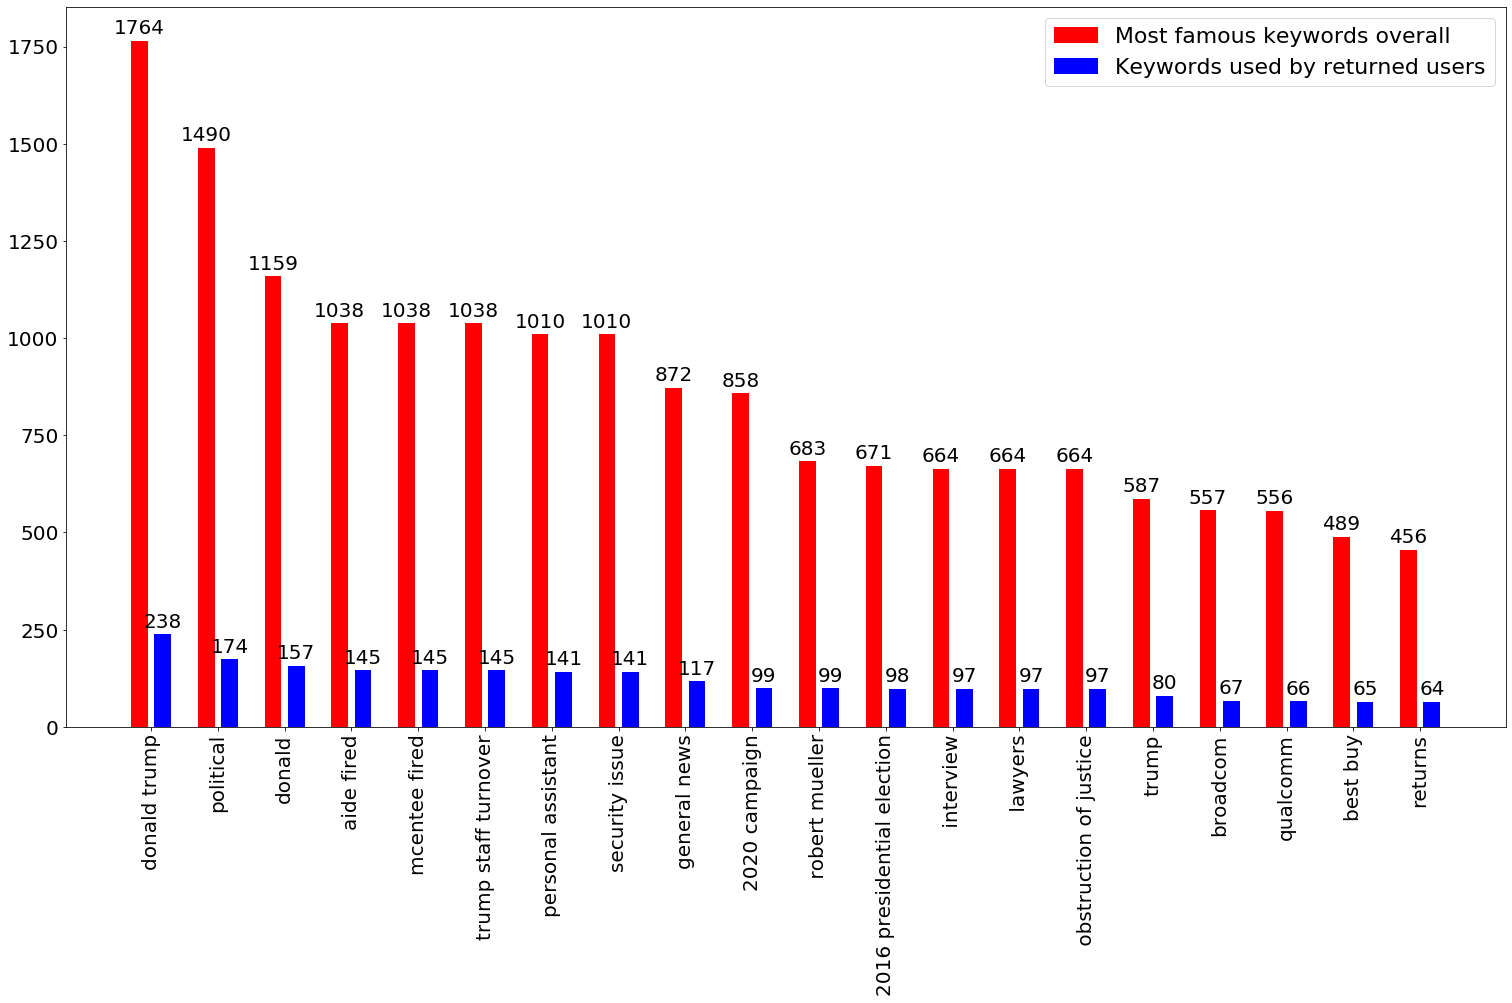

In [218]:
data = [y,y5]
X = np.arange(len(x))
width =0.35
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(X - width/2, data[0], color = 'r', width = 0.25, label = "Most trending keywords overall")
rect2 = ax.bar(X + width/2, data[1], color = 'b', width = 0.25, label = "Keywords used by returned users")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 20)

ax.set_xticks(X)
ax.set_xticklabels(x)
ax.legend()
autolabel(rect1)
autolabel(rect2)
plt.rcParams.update({'font.size':22})
plt.xticks(rotation=90)
fig.tight_layout()

<div class="alert alert-block alert-success"> 
    <b>
The below two graphs shows us the most trending keywords based on two different bag of words. 

<li>First time visitor most trending keywords.</li>
<li>Second time visitor most trending keywords.</li>

</b>
</div>

### Simple representation of the most trending keywords based on first time users



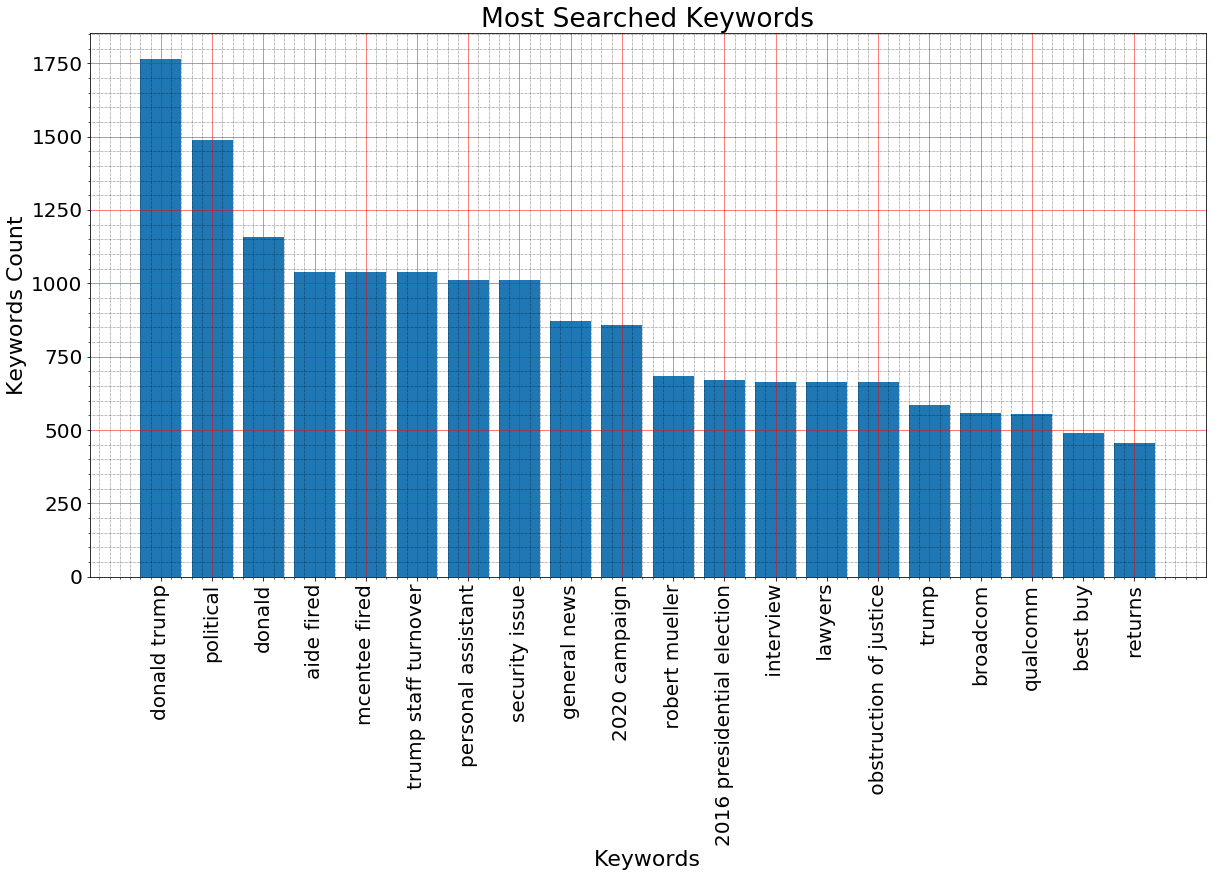

In [193]:
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Keywords Count")
plt.title('Most Searched Keywords')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()



### Simple representation of the most trending keywords based on second time users



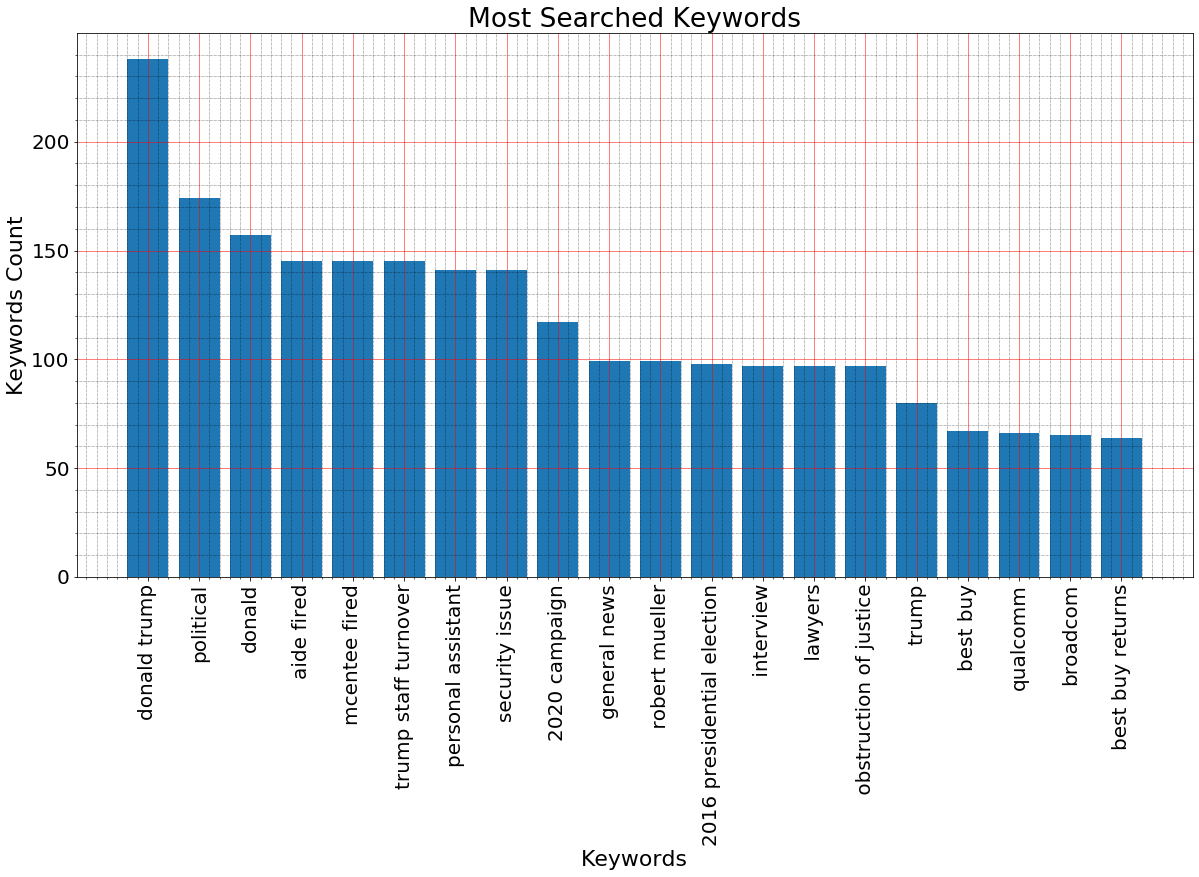

In [194]:
plt.figure(figsize=(20,10))
plt.bar(x5,y5)
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Keywords Count")
plt.title('Most Searched Keywords')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

### 5. Create a simple model predicting the likelihood of a first-time visitor returning.



<div class="alert alert-block alert-success"> 
    <b> Based on the dataset we took test size 0.33 i.e. 3300 out of 10000 records and achieved an accuracy of 88% which is very good.
        
        
     Steps followed to achieve the result:        
        
<ol><li>Normalise the numerical columns  totalVisits, wordCount, videoCount.</li>
<li>Encode categorical value i.e.'Section' with unique value.</li>
<li>Create returned column users with binary data based on secondVisitDate.</li>
<li>Train and split data using sklearn.model_selection</li>        
        </ol>
   </b>
</div>



In [196]:
df.head()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0


In [197]:
df.columns

Index(['customerID', 'firstVisitDate', 'secondVisitDate', 'articleID',
       'section', 'author', 'headline', 'topicKeywords', 'totalVisits',
       'wordCount', 'videoCount'],
      dtype='object')

### Encode categorical value i.e.'Section' with unique value.

In [198]:
df_normalize_data = df
df_normalize_data.section = df.section.astype('category').cat.codes
df_normalize_data["returned_users"]=np.where(pd.isnull(df["secondVisitDate"]),0,1)
df_normalize_data

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount,returned_users
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,0,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0,1
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,0,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0,0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,3,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0,0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,0,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0,0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,2,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0,0
5,5,2018-03-13 14:26:42 UTC,NaN,SB10053721253826474326804584099213856176886,4,A+Wall+Street+Journal+Roundup,WSJ_Article_Politics and Policy_Donald Trump a...,donald trump|gina haspel|mike pompeo|president...,1,947.0,0.0,0
6,6,2018-03-18 18:13:23 UTC,NaN,SB12008635076439604245104584087373693353570,3,Alexandra+DeSanctis,WSJ_Article_Houses of Worship_Notre Dame Becom...,birth control|catholic church|obama administra...,1,819.0,0.0,0
7,7,2018-03-13 11:59:08 UTC,NaN,SB10053721253826474326804584099101464018882,4,Michael+C.+Bender,WSJ_Article_Politics and Policy_Trump’s Person...,2020 campaign|aide fired|mcentee fired|persona...,1,657.0,0.0,0
8,8,2018-03-12 18:46:24 UTC,NaN,SB10053721253826474326804584097180460822064,2,Liz+Hoffman,WSJ_Article_Markets Main_Goldman Sachs Puts Da...,david solomon|goldman|goldman sachs ceo|goldma...,1,1169.0,0.0,0
9,9,2018-03-16 13:37:01 UTC,NaN,SB11027093093037343542404584105290821213788,4,Michael+C.+Bender,WSJ_Article_Politics and Policy_Donald Trump a...,cabinet|chief of staff|firings|john kelly|staf...,1,1274.0,0.0,0


# Using Logistic Regression

### Normalise the numerical columns totalVisits, wordCount, videoCount.

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
numerical=['totalVisits','wordCount','videoCount']

features_log_minmax_transform = pd.DataFrame(data=df_normalize_data)
features_log_minmax_transform[numerical] = scaler.fit_transform(df_normalize_data[numerical])

df_predict=features_log_minmax_transform

In [200]:
df_predict["returned_users"]=np.where(pd.isnull(df["secondVisitDate"]),0,1)

In [201]:
df_predict=df_predict.reset_index()

### Split the data into training set and testing set using train_test_split

In [202]:
from sklearn.model_selection import train_test_split

X=df_predict[['totalVisits','wordCount','videoCount','section']]
y=df_predict['returned_users']

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
X_train=X_train.fillna(X_train.mean())
X_test=X_test.fillna(X_train.mean())
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [210]:
predictions=logmodel.predict(X_test)

In [211]:
from sklearn.metrics import accuracy_score

In [212]:
print(accuracy_score(y_test,predictions))

0.8812121212121212


## Our model can predict with 88% accuracy the likelihood of a first time visitor returning, based on the customers interaction with the articles.

### 6. What additional data would you add to improve the model? (Answer in 3-5 sentences)


<div class="alert alert-block alert-success"> 
    <b>
Having more data is always a good idea, instead of relying on assumptions and weak correlations. 

We can add columns with more correlation like customer demographics(age, location, etc.) and social network shares.

    Example: analyzing data based on different cities or states which would help us find a meaningful correlation between the age group of customers and the articles. Also, In which area we have the highest number of readers.

The current data require heavy feature engineering to convert the current columns into meaningful columns.

</b>
</div>
 
      

### 7. What other interesting stories can you tell with this data?

<div class="alert alert-block alert-success"> 
    <b>
<ol>
<li>Percentage of customers returned between the window of 1 to 30 days, 31 to 60 days, 61 to 90 days, >90 days.</li>
<li>Including the share link data, information might help us to track the viral articles and sections.</li>
<li>Most read articles and least read articles based on the existing data.</li>
<li>Define retention as a table of multiple retention rates and target quaterly, monthly, weekly trends based on previous year data.</li>
<li> Based on the article word count we can tell if the users like to read lengthy articles or short articles.</li>
<li> which author's article has high customer click rate.</li>    
</ol>
    </b>
</div>